In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("tvmarketing.csv")
print(df.head())


      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [4]:
print("column type")
print(df.dtypes)

column type
TV       float64
Sales    float64
dtype: object


In [6]:
print("shapes of datatype")
print(df.shape)

shapes of datatype
(200, 2)


In [7]:
print("Summary of data")
print(df.describe())

Summary of data
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


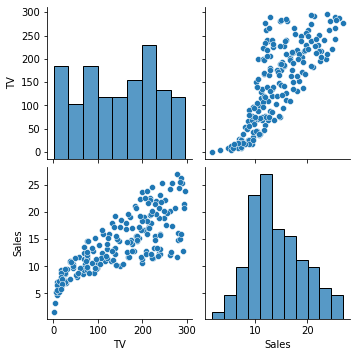

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

plt.show()

In [16]:
X = df[[feature_column]].values
y = df[dependent_variable].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print("\nShape of Training Data:", X_train.shape, y_train.shape)
print("Shape of Testing Data:", X_test.shape, y_test.shape)



Shape of Training Data: (140, 1) (140,)
Shape of Testing Data: (60, 1) (60,)


In [28]:
print("\nShape of Training Data:", X_train.shape, y_train.shape)
print("Shape of Testing Data:", X_test.shape, y_test.shape)



Shape of Training Data: (140, 1) (140,)
Shape of Testing Data: (60, 1) (60,)


In [31]:
import numpy as np
X_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)
numerator = np.sum((X_train - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train - X_train_mean) ** 2)
slope = numerator / denominator
intercept = y_train_mean - (slope * X_train_mean)

print("\nCalculated Coefficients:")
print("Slope:", slope)
print("Intercept:", intercept)


Calculated Coefficients:
Slope: 1.4640088547120868e-17
Intercept: 14.497142857142856


In [33]:
# 10. Create the model using calculated coefficients and make predictions on test data
y_pred_manual = slope * X_test + intercept
print(y_pred_manual)

[[14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]
 [14.49714286]]


In [36]:

# 11. Perform Linear Regression using library (sklearn)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
#12. Print intercept and coefficients
print("\nLibrary Coefficients:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])



Library Coefficients:
Intercept: 7.239459830751138
Slope: 0.046407802128152764


In [42]:
# 13. Make predictions on the testing set
y_pred = model.predict(X_test)

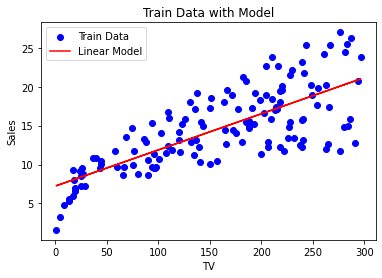

array([11.88024004])

In [65]:
# 14. Plot train data and the model
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Linear Model')
plt.xlabel(feature_column)
plt.ylabel(dependent_variable)
plt.title("Train Data with Model")
plt.legend()
plt.show()
model.predict(np.array([[100],]))

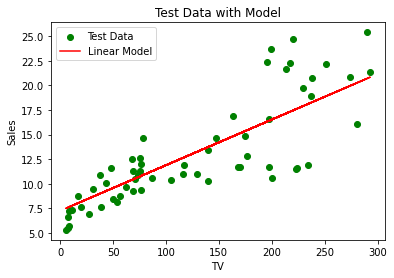

In [44]:
# 15. Plot test data and the model
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Linear Model')
plt.xlabel(feature_column)
plt.ylabel(dependent_variable)
plt.title("Test Data with Model")
plt.legend()
plt.show()


In [46]:
# 16. Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-Squared Value:", r2)



Mean Squared Error: 8.970991242413614
R-Squared Value: 0.6714477229302764


In [50]:
# 17. Calculate R-Squared and Adjusted R-Squared without library
total_variance = np.sum((y_test - np.mean(y_test)) ** 2)
explained_variance = np.sum((y_pred_manual - np.mean(y_test)) ** 2)
r_squared_manual = explained_variance / total_variance
adjusted_r2 = 1 - ((1 - r_squared_manual) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("\nManual R-Squared Value:", r_squared_manual)
print("Adjusted R-Squared Value:", adjusted_r2)


Manual R-Squared Value: 0.09167595410450567
Adjusted R-Squared Value: 0.07601519469251439


In [53]:
X_train

array([[284.3],
       [184.9],
       [112.9],
       [ 23.8],
       [290.7],
       [ 19.4],
       [293.6],
       [ 18.7],
       [134.3],
       [ 25.6],
       [100.4],
       [ 80.2],
       [188.4],
       [177. ],
       [125.7],
       [209.6],
       [142.9],
       [184.9],
       [222.4],
       [241.7],
       [ 17.2],
       [120.5],
       [ 89.7],
       [191.1],
       [ 75.5],
       [193.2],
       [ 85.7],
       [266.9],
       [ 39.5],
       [261.3],
       [ 13.2],
       [193.7],
       [296.4],
       [265.6],
       [214.7],
       [149.7],
       [131.7],
       [ 57.5],
       [240.1],
       [141.3],
       [180.8],
       [ 97.2],
       [220.5],
       [140.3],
       [255.4],
       [ 96.2],
       [ 66.1],
       [239.3],
       [175.7],
       [240.1],
       [ 17.9],
       [230.1],
       [283.6],
       [171.3],
       [199.1],
       [123.1],
       [131.1],
       [ 25.1],
       [163.5],
       [248.8],
       [202.5],
       [ 13.1],
       [